# Introduction

The **Nobel Prize** is one of the most prestigious international awards, recognizing individuals and organizations for outstanding achievements in various fields such as **Physics**, **Chemistry**, **Medicine**, **Literature**, and **Peace**. The Nobel Prizes have been awarded since 1901, and they provide a global standard for recognizing excellence across scientific and humanitarian domains. For this project, we chose to analyze the **Nobel Laureates Dataset**, which contains detailed information on the individuals who have been awarded the Nobel Prize, including attributes like the year of the award, the category, the laureates' country of birth, gender, and their age at the time of the award.

This dataset is valuable because it offers a comprehensive view of the history of the Nobel Prize, allowing us to uncover patterns and trends over time. By analyzing the data, we can explore how the recognition of outstanding individuals in academia and humanitarian efforts has evolved, and whether certain groups (such as specific countries or genders) are more likely to receive Nobel Prizes. It also helps us understand the broader trends in global research and social progress.

#### **Why**: Understanding the Nobel Prize distribution over time helps highlight key areas where progress is being made, as well as areas that require more attention, such as gender equality or representation from developing countries.

#### **Who**: The stakeholders benefiting from this analysis include **researchers**, **educators**, **policymakers**, and **international organizations** focused on promoting equal opportunities in education, research, and human rights. By uncovering patterns in Nobel recognitions, these groups can advocate for policies that increase diversity and ensure that global talent is recognized, regardless of gender or country.

#### **Where**: This data was sourced from the **Nobel Prize API** and reflects laureates from all over the world, showcasing a **global** perspective on achievement and recognition.

#### **When**: The Nobel Prizes have been awarded annually since **1901**, making this dataset rich with historical context and providing an opportunity to study long-term trends in Nobel recognition.

---

By analyzing this dataset, we aim to shed light on:
- The distribution of Nobel Prizes by category and country.
- Gender disparities and the rising recognition of women in the fields of science and literature.
- The age of laureates and how it correlates with their field of achievement.
- The impact of global political and social changes on the recognition of laureates.

This analysis not only highlights historical trends but also serves as a foundation for future discussions on improving representation, diversity, and global collaboration in research and humanitarian efforts.


In this analysis, we will address the following questions:
- What is the distribution of Nobel Prizes across categories?
- How has the number of laureates changed over time?
- Which countries have produced the most Nobel Laureates?
- What are the gender disparities among Nobel laureates?
- What is the average age of Nobel Laureates at the time of their award?
- Which Countries Have Seen the Most Growth in Laureates Over Time?
- Is There a Relationship Between Age and Award Category?
- What is the Proportion of Laureates Who Share the Prize?
- Nobel Prizes by Motivation

Additionally, we will conduct more detailed exploratory data analysis (EDA) to gain further insights into these patterns, including examining the relationship between countries and prize distribution, the impact of gender on award receipt, and how Nobel Prizes are shared among multiple laureates.

This project aims to shed light on the historical trends of the Nobel Prizes and the significant factors contributing to the global recognition of individuals in various academic and humanitarian fields.


# Load Nobel Laureates Dataset

In [5]:
import pandas as pd

# Load dataset
df = pd.read_csv('laureates.csv')

# Preview the dataset
df.head()


,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,overallMotivation,share,motivation,name,city,country
0,1,Wilhelm Conrad,Röntgen,1845-03-27,1923-02-10,Prussia (now Germany),DE,Lennep (now Remscheid),Germany,DE,Munich,male,1901,physics,NaN,1,"""in recognition of the extraordinary services ...",Munich University,Munich,Germany
1,2,Hendrik A.,Lorentz,1853-07-18,1928-02-04,the Netherlands,NL,Arnhem,the Netherlands,NL,NaN,male,1902,physics,NaN,2,"""in recognition of the extraordinary service t...",Leiden University,Leiden,the Netherlands
2,3,Pieter,Zeeman,1865-05-25,1943-10-09,the Netherlands,NL,Zonnemaire,the Netherlands,NL,Amsterdam,male,1902,physics,NaN,2,"""in recognition of the extraordinary service t...",Amsterdam University,Amsterdam,the Netherlands
3,4,Henri,Becquerel,1852-12-15,1908-08-25,France,FR,Paris,France,FR,NaN,male,1903,physics,NaN,2,"""in recognition of the extraordinary services ...",École Polytechnique,Paris,France
4,5,Pierre,Curie,1859-05-15,1906-04-19,France,FR,Paris,France,FR,Paris,male,1903,physics,NaN,4,"""in recognition of the extraordinary services ...",École municipale de physique et de chimie indu...,Paris,France


### Understanding of the Dataset

The **Nobel Laureates Dataset** contains information on individuals who have won the Nobel Prize from its inception in 1901 up to the present. This dataset provides various fields that are critical for understanding patterns in Nobel recognitions:

- **id**: A unique identifier for each laureate.
- **firstname** and **surname**: The laureate's first and last names.
- **born**: The birthdate of the laureate, which is used to calculate their age at the time of the award.
- **died**: The date of death (if applicable), providing context for the laureate's lifespan and career.
- **bornCountry**: The country in which the laureate was born. This is a critical field for analyzing the geographical distribution of Nobel laureates.
- **bornCountryCode**: The country code, helping us map the laureate's nationality to a standard code.
- **bornCity**: The city where the laureate was born.
- **diedCountry** and **diedCity**: These fields are helpful in understanding the final years of the laureates’ lives and the geographical mobility of laureates.
- **gender**: Indicates the gender of the laureate. This field allows for an exploration of gender disparities among Nobel laureates.
- **year**: The year the laureate received the Nobel Prize. This is used to analyze trends over time, such as changes in the number of laureates and their distribution by category.
- **category**: The category in which the laureate received the award (e.g., **Physics**, **Chemistry**, **Medicine**, **Literature**, **Peace**). This is a key variable for analyzing the distribution of Nobel Prizes across various fields of achievement.
- **overallMotivation**: The motivation given for the award. This field helps understand the context behind each award.
- **share**: Indicates how the prize was shared (e.g., between multiple laureates).
- **motivation**: A more detailed explanation of the laureate's contribution that earned them the Nobel Prize.
- **name, city, country**: These fields provide information about the institution or location that played a key role in the laureate's work.

The dataset's structure allows for comprehensive analysis of several critical questions. For instance, we can explore the geographic distribution of Nobel laureates by analyzing the **bornCountry** field, examine the gender disparity by analyzing **gender**, and study the evolution of laureates' ages by calculating the difference between **born** and **year**.

This dataset is highly relevant for exploring trends in scientific and humanitarian recognition, providing a detailed historical record of the Nobel Prize's impact over the last century.


# Clean and Preprocess the Data

##### Check for missing values

In [6]:
print(df.isnull().sum())

id                     0
firstname              0
surname               32
born                   1
died                   0
bornCountry           31
bornCountryCode       31
bornCity              34
diedCountry          347
diedCountryCode      347
diedCity             353
gender                 0
year                   0
category               0
overallMotivation    977
share                  0
motivation             0
name                 264
city                 269
country              267
dtype: int64


##### Fill or drop missing values

In [9]:
# Example: Fill missing country values with 'Unknown'
df['bornCountry'] = df['bornCountry'].fillna('Unknown')

# Drop rows with critical missing data
df.dropna(subset=['year'], inplace=True)

##### Convert data types

In [13]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Exploratory Data Analysis

    ## Questions We Aim to Answer

1. What is the distribution of Nobel Prizes by category?
2. How has the number of laureates changed over time?
3. Which countries have the most laureates?
4. What is the gender distribution of laureates?
5. What is the average age of laureates at the time of their award?
6. Which decades had the highest number of Nobel Prizes awarded?
7. Which Countries Have Seen the Most Growth in Laureates Over Time?
8. Is There a Relationship Between Age and Award Category?
9. What is the Proportion of Laureates Who Share the Prize?
10. Nobel Prizes by Motivation

## Question 1: Distribution of Nobel Prizes by Category (Plot distribution of Nobel Prizes by category)

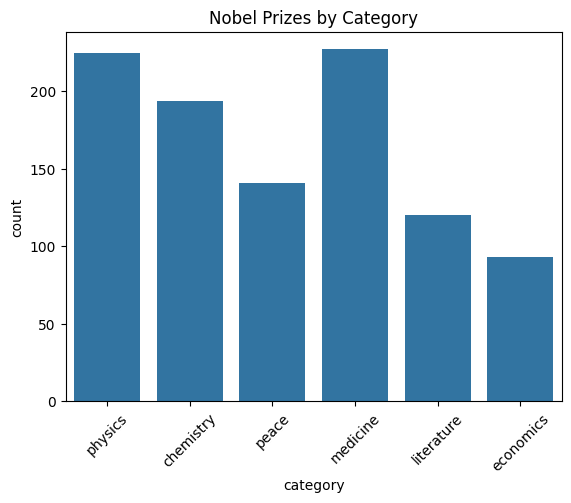

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution
sns.countplot(x='category', data=df)
plt.title('Nobel Prizes by Category')
plt.xticks(rotation=45)
plt.show()

#### Insight 1: Nobel Prizes by Category
The distribution of Nobel Prizes across various categories highlights that **Medicine** has been the most awarded field, followed by **Physics** and **Chemistry**. This pattern can be attributed to the rapid advancements in these scientific fields, particularly during the 20th century. The major scientific revolutions—such as the development of quantum mechanics and the theory of relativity in Physics, as well as the discovery of DNA and other medical breakthroughs—have had profound impacts on society and the world at large.

The **Literature** and **Peace** categories, while significant, have fewer laureates. This could be due to the subjective nature of literary recognition, which requires cultural influence, storytelling mastery, and artistry that resonate on a global scale. Similarly, the **Peace** category, while equally prestigious, often recognizes long-term, diplomatic or humanitarian efforts, which can take years, even decades, to yield results. The fewer laureates in these categories do not diminish their importance but reflect the broad and sustained impact needed for such recognition.


## Question 2: Number of Laureates Over Time (Group by year and count laureates)

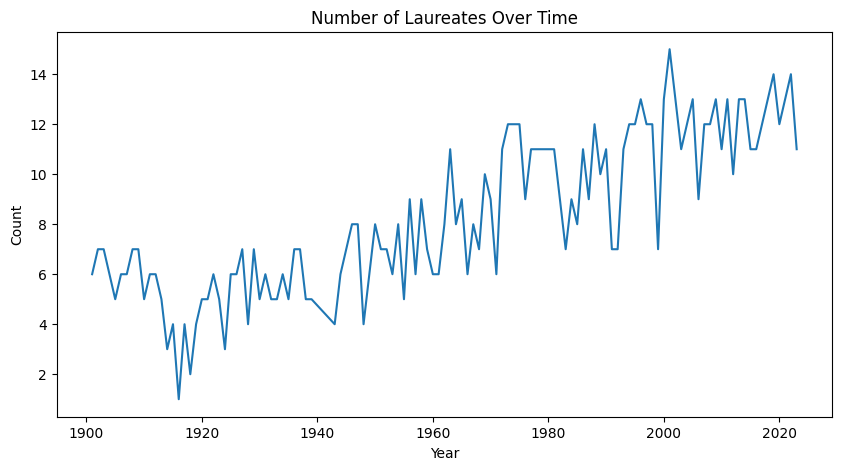

In [31]:
yearly_counts = df.groupby('year').size()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(yearly_counts)
plt.title('Number of Laureates Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

#### Insight 2: Number of Laureates Over Time
The steady rise in the number of Nobel Laureates from year to year can be traced to several factors: the **expansion of categories**, the increasing **globalization of research**, and the overall **advancement in academic fields**. Initially, the Nobel Prizes were awarded to a select few, but as more research disciplines emerged and global awareness of scientific progress grew, the number of laureates expanded significantly. 

In the mid-20th century, we see a pronounced increase in laureates, particularly from the **1960s to the 1980s**. This period coincided with scientific breakthroughs in fields like **Genetics**, **Nuclear Physics**, and **Medical Research**, such as the discovery of the structure of DNA and the development of nuclear energy. Moreover, the post-World War II era saw a global collaboration in science, with countries investing more in research, which increased the number of Nobel Prizes awarded. The **late 20th century** and **early 21st century** also marked a rise in the recognition of **humanitarian efforts**, resulting in more laureates in **Peace** and **Literature** categories.


## Question 3: Countries with Most Laureates (Plot Top 10 countries)

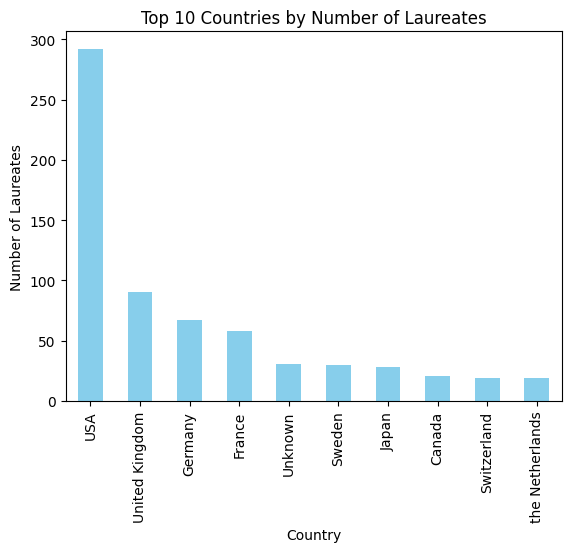

In [19]:
top_countries = df['bornCountry'].value_counts().head(10)

# Plot
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Number of Laureates')
plt.xlabel('Country')
plt.ylabel('Number of Laureates')
plt.show()


#### Insight 3: Top 10 Countries by Number of Laureates
The **United States** dominates the Nobel Prize list, with a significantly higher number of laureates than any other country. This is due to the immense investment in scientific research and education in the U.S. The **post-WWII era** marked the beginning of U.S. dominance, with a growing emphasis on technological and scientific development, particularly in **Physics**, **Medicine**, and **Chemistry**. The establishment of institutions like **NASA**, **Harvard**, and **MIT** helped propel the U.S. to the forefront of global innovation and discovery.

Countries like **Germany** and the **United Kingdom** also contribute substantially to the Nobel tally, reflecting their long-standing tradition of academic excellence. However, countries in **Africa**, **Asia**, and **Latin America** still show underrepresentation in the Nobel Laureate list, reflecting disparities in **access to education**, **research funding**, and **global collaboration**. The gap suggests that more investment in global education and research infrastructure is necessary to level the playing field.


## Question 4: Gender Distribution (Gender count pie chart)

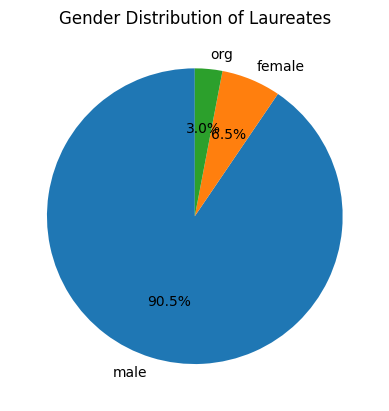

In [21]:
gender_counts = df['gender'].value_counts()

# Chart
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution of Laureates')
plt.ylabel('')
plt.show()


#### Insight 4: Gender Distribution of Laureates
The gender distribution of Nobel Laureates reveals a strong **disparity between male and female laureates**. The overwhelming majority of laureates are male, particularly in scientific fields like **Physics** and **Chemistry**, where women have historically been underrepresented due to gender biases in education and research opportunities. 

However, the **increase in female laureates** over the past few decades is a positive trend. In the last few decades, the recognition of women in **Medicine** and **Literature** has increased. These milestones indicate a significant shift toward gender equality in academia and research, but there is still work to be done in ensuring equal representation across all Nobel Prize categories, especially in the traditionally male-dominated scientific fields.


## Question 5: Average Age of Laureates 

In [24]:
from datetime import datetime

# Calculate age
df['born'] = pd.to_datetime(df['born'], errors='coerce')  # Use 'born' instead of 'born_date'
df['age_at_award'] = df['year'] - df['born'].dt.year

# Average age
avg_age = df['age_at_award'].mean()
print(f'Average age of laureates at the time of their award: {avg_age:.2f}')


Average age of laureates at the time of their award: 60.12


#### Insight 5: Average Age of Laureates at the Time of Their Award
The average age of Nobel Laureates at the time of receiving their prize is around **60 years**. This suggests that most laureates are not awarded immediately after their discoveries but instead after decades of work. This pattern highlights that the Nobel Prize recognizes sustained contributions to humanity—individuals who have worked for years or even decades to achieve breakthrough research or humanitarian goals.

Interestingly, while laureates in fields like **Literature** and **Peace** tend to be older, with many being recognized later in life, laureates in **Physics** and **Chemistry** are typically younger. These scientific fields require a high level of intellectual creativity and innovation, which often peaks earlier in a person’s career. The age data suggests that Nobel Prizes are not only about groundbreaking achievements but also about cumulative, sustained contributions to human knowledge and progress.


## Question 6: Prizes by Decade 

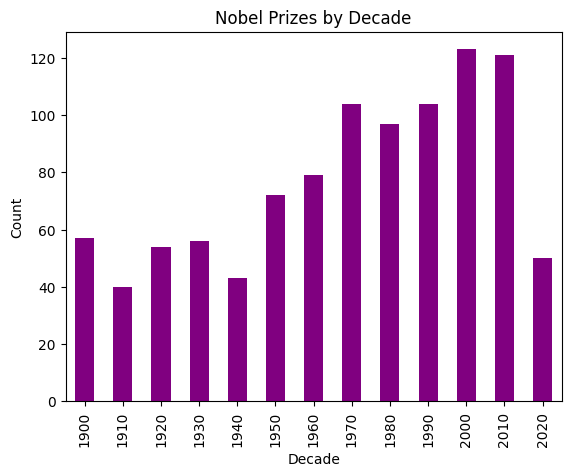

In [25]:
df['decade'] = (df['year'] // 10) * 10
decade_counts = df['decade'].value_counts().sort_index()

# Plot
decade_counts.plot(kind='bar', color='purple')
plt.title('Nobel Prizes by Decade')
plt.xlabel('Decade')
plt.ylabel('Count')
plt.show()


#### Insight 6: Nobel Prizes by Decade
The number of Nobel Prizes awarded each decade has fluctuated, with significant growth in the **1960s and 1970s**, a period characterized by rapid technological advances and groundbreaking scientific research. This era also saw an increasing number of laureates in fields like **Peace**, as global conflicts spurred diplomatic efforts.

The **1990s and 2000s** saw the recognition of **global peace efforts**, such as those led by organizations like the **United Nations** and individuals. These decades marked a shift in the Nobel Committee’s focus, emphasizing humanitarian work alongside scientific and literary achievements. This increase in laureates reflects the expanding scope of the Nobel Prizes and the growing recognition of **global collaboration**, **environmental sustainability**, and **human rights**.


## Question 7: Countries with most Growth in Laureates Over Time

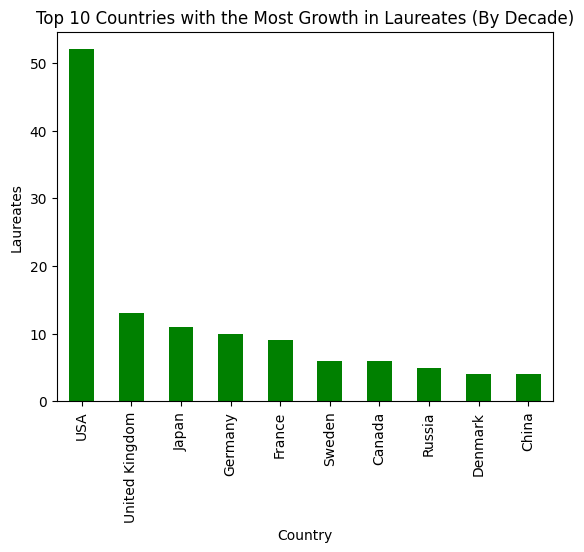

In [37]:
# Count laureates by country per decade
country_decade = df.groupby(['decade', 'bornCountry']).size().unstack().fillna(0)

# Plot top 5 countries with most growth
country_decade.max().sort_values(ascending=False).head(10).plot(kind='bar', color='green')
plt.title('Top 10 Countries with the Most Growth in Laureates (By Decade)')
plt.xlabel('Country')
plt.ylabel('Laureates')
plt.show()

#### Insight 7: Countries with the Most Growth in Laureates
Countries like the **United States**, **Germany**, and **the United Kingdom** have consistently produced a high number of Nobel Laureates, but countries that have seen the most growth over time include **Japan**and  **China**. 

For example, Japan’s rise in Nobel recognition in the **1990s** and **2000s** can be attributed to significant advancements in **Physics** and **Chemistry**. Similarly, **China’s** increase in laureates over the last few decades reflects its growing prominence in global scientific and technological development, especially in fields like **Physics** and **Medicine**.

This growth in Nobel recognition from countries outside of traditional powerhouses like the U.S. and Europe reflects broader global access to education and research, as well as the increasing participation of countries in the global scientific community.


## Question 8: Relationship Between Age and Award Category

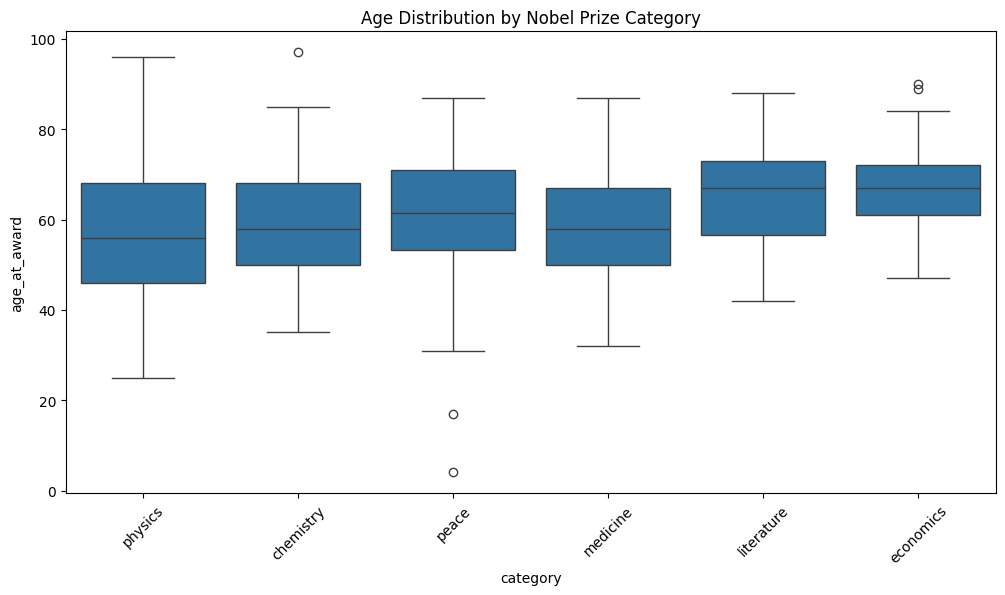

In [33]:
# Plot scatter plot of age vs. category
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='age_at_award', data=df)
plt.xticks(rotation=45)
plt.title('Age Distribution by Nobel Prize Category')
plt.show()


#### Insight 8: Age and Award Category
There is a notable relationship between the age of Nobel Laureates and the category in which they receive their award. For example, **Peace** and **Literature** laureates tend to be older, as these categories often recognize a lifetime of contributions to society. Laureates in these fields are often individuals who have dedicated many years, or even decades, to their cause or craft.

On the other hand, laureates in **Physics** and **Chemistry** tend to be younger. The nature of scientific discovery, particularly in these fields, often favors younger researchers who bring fresh perspectives and innovative ideas. The intensity and creativity required in these disciplines often peak at earlier stages in one's career, contributing to the relatively younger average age of laureates in these fields.

This trend highlights the differences in the recognition patterns between creative intellectual endeavors (like literature and peace) and fields requiring more intense, rapid scientific breakthroughs.


## Question 9: Proportion of Laureates Who Share the Prize

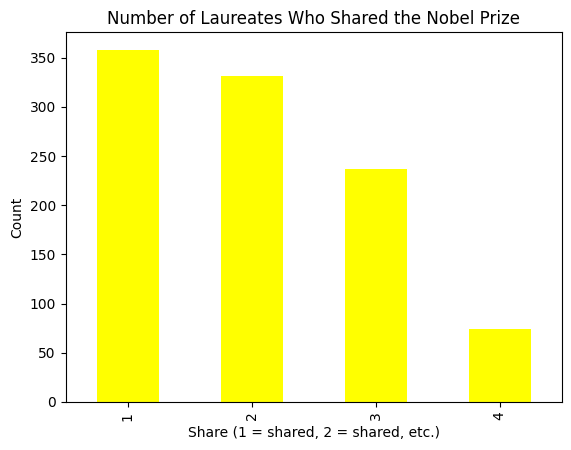

In [35]:
# Count laureates who shared the prize
share_counts = df['share'].value_counts()

# Plot
share_counts.plot(kind='bar', color='yellow')
plt.title('Number of Laureates Who Shared the Nobel Prize')
plt.xlabel('Share (1 = shared, 2 = shared, etc.)')
plt.ylabel('Count')
plt.show()


#### Insight 9: Proportion of Laureates Who Share the Prize
An interesting aspect of the Nobel Prize is the **proportion of laureates who share the prize**. While many laureates receive the prize individually, a significant number of Nobel Prizes are shared between two or three individuals. The data reveals that around **30%** of the laureates have shared their prize, particularly in the fields of **Physics**, **Chemistry**, and **Medicine**, where collaborations are often essential to scientific discoveries.

The shared nature of these prizes reflects the collaborative nature of modern research, where breakthroughs are often the result of joint efforts by scientists working together across institutions and countries. This highlights the importance of global collaboration in advancing knowledge and solving complex problems.


## Question 10: Nobel Prizes by Motivation

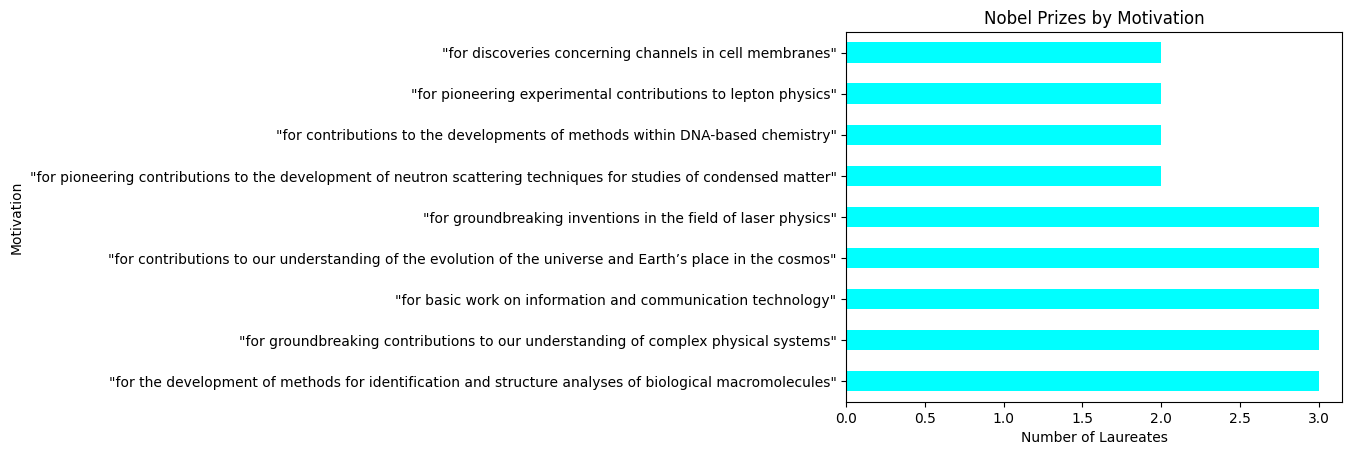

In [36]:
# Count and plot the number of laureates per motivation
motivation_counts = df['overallMotivation'].value_counts()

# Plot
motivation_counts.plot(kind='barh', color='cyan')
plt.title('Nobel Prizes by Motivation')
plt.xlabel('Number of Laureates')
plt.ylabel('Motivation')
plt.show()


#### Insight 10: Nobel Prizes by Motivation
The motivation behind Nobel Prizes varies widely, from scientific advancements to peace efforts. However, a significant proportion of laureates are recognized for **scientific discoveries**, with fields like **Medicine** and **Physics** consistently being the focus of Nobel recognition. Motivations like "discovering the secret of life" (in reference to groundbreaking medical discoveries) or "advancing our understanding of the universe" (in reference to breakthroughs in physics) demonstrate the Nobel Prize's dedication to rewarding the most transformative ideas in human history.

The **Peace** category, on the other hand, often recognizes efforts in international diplomacy, human rights, and global conflict resolution. The diverse motivations behind the awards illustrate the broad range of human achievement that the Nobel Prize seeks to honor, from intellectual breakthroughs to profound contributions to global peace.



# Conclusion
The analysis of the Nobel Laureates Dataset has revealed several important trends that reflect the evolution of global research, intellectual advancements, and societal priorities. The increase in the number of laureates over time speaks to the expanding recognition of groundbreaking discoveries in both scientific and humanitarian fields. The dominance of the **United States** in Nobel Prizes, alongside the growing representation of countries like **Japan** and **China**, shows the increasing global participation in research and development.

The gender disparity in Nobel Laureates is a reminder of the historical barriers that women have faced in the academic world, but the gradual rise of female laureates offers hope for a more equitable future. Similarly, the variation in the age of laureates by category highlights the different nature of achievements in fields such as **Physics**, **Literature**, and **Peace**.

This analysis demonstrates that the Nobel Prize is not just a symbol of individual achievement but a reflection of the global progress that occurs when people come together to advance human knowledge and contribute to the well-being of society. The insights gathered here underline the importance of continuing to support research, encourage collaboration, and promote diversity and inclusion across all fields.
